# 주성분 분석(PCA / 차원 축소)
- 주성분 분석에서의 차원이란?  
차원 = 특성이라고 이해를 하면 된다

In [23]:
import numpy as np
fruits = np.load('data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)
fruits_2d.shape

(300, 10000)

In [24]:
from sklearn.decomposition import PCA

# n_components : 주성분의 갯수 설정
pca = PCA(n_components= 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [25]:
pca.components_.shape

(50, 10000)

In [26]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

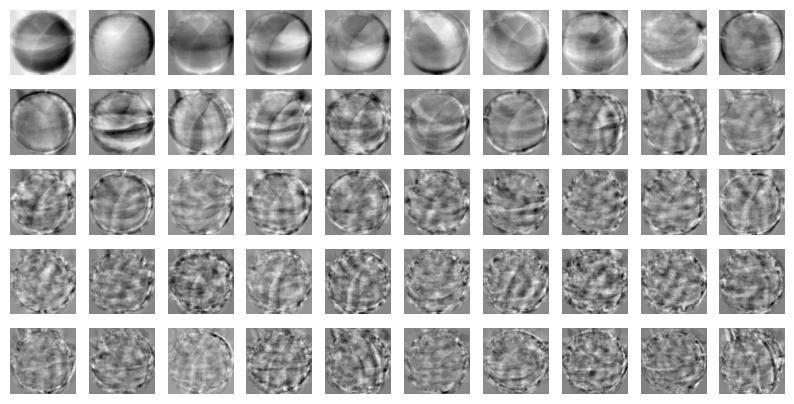

In [27]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [28]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

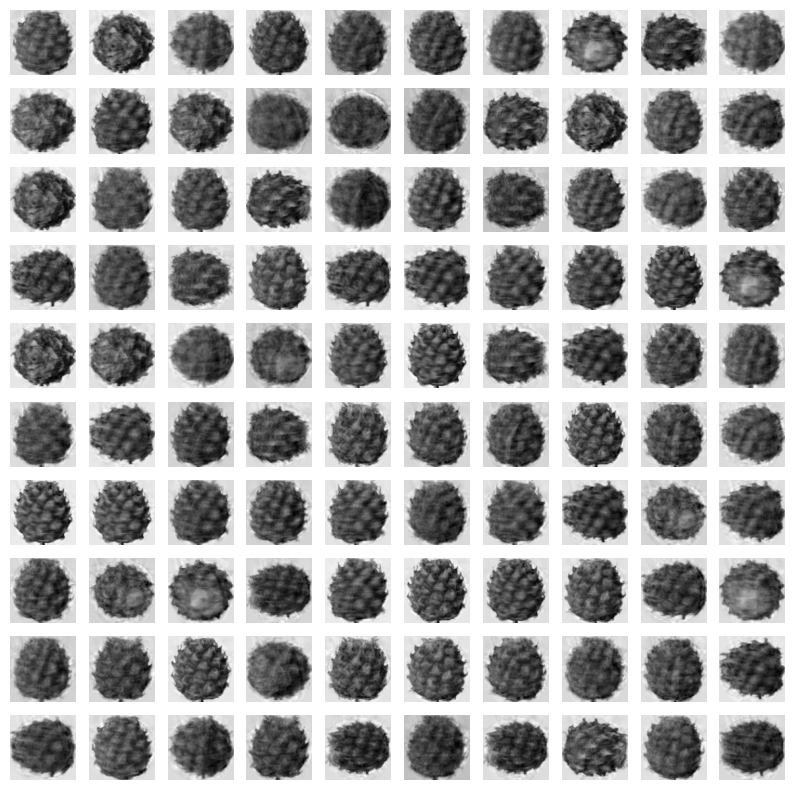

In [29]:
# 원상복구
fruits_inverse = pca.inverse_transform(fruits_pca)
f = fruits_inverse.reshape(-1, 100, 100)
draw_fruits(f[100:200])

In [30]:
# explained_variance_ratio_: 각각의 픽셀들이 얼마만큼의 역할을 하고 있는가 설명을 해준다
pca.explained_variance_ratio_

array([0.42357017, 0.09941755, 0.06577863, 0.04031172, 0.03416875,
       0.03281329, 0.02573267, 0.02054963, 0.01372276, 0.01342773,
       0.01152146, 0.00944596, 0.00878232, 0.00846697, 0.00693049,
       0.00645188, 0.00578895, 0.00511203, 0.00486383, 0.00480346,
       0.00447834, 0.00437315, 0.00408038, 0.00389464, 0.00372445,
       0.00359289, 0.00331446, 0.00317843, 0.00304272, 0.00303738,
       0.00288944, 0.00275906, 0.00264982, 0.00255858, 0.00252043,
       0.00247334, 0.00239537, 0.00230927, 0.00222172, 0.00216684,
       0.00213615, 0.001964  , 0.00193155, 0.00191198, 0.00183956,
       0.00181397, 0.00174186, 0.00169418, 0.00164095, 0.00162949])

In [31]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9216246522772997)

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0]* 100 + [1]*100 + [2]*100)

In [33]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)

print(scores)

{'fit_time': array([0.11669803, 0.1148138 , 0.13202691, 0.10446525, 0.14857316]), 'score_time': array([0.00118899, 0.00107598, 0.00118709, 0.00107002, 0.00098205]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [34]:
scores = cross_validate(lr, fruits_pca, target)
print(scores)

{'fit_time': array([0.003582  , 0.00249887, 0.00197411, 0.00255394, 0.00430799]), 'score_time': array([0.0003252 , 0.00029516, 0.00022674, 0.00021601, 0.00039506]), 'test_score': array([1.        , 1.        , 1.        , 0.98333333, 1.        ])}


In [35]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
pca.n_components_

np.int64(2)

In [36]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [37]:
scores = cross_validate(lr, fruits_pca, target)
print(scores)

{'fit_time': array([0.00960469, 0.00630832, 0.00728774, 0.00392604, 0.00758982]), 'score_time': array([0.00060105, 0.00035501, 0.00052929, 0.00027394, 0.00037217]), 'test_score': array([0.98333333, 1.        , 1.        , 0.98333333, 1.        ])}


/Users/chojungseok/Desktop/code/DAMF2/ML/MLvenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/chojungseok/Desktop/code/DAMF2/ML/MLvenv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

In [38]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
km.fit(fruits_pca)

KMeans(n_clusters=3)

In [39]:
km.labels_

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], d

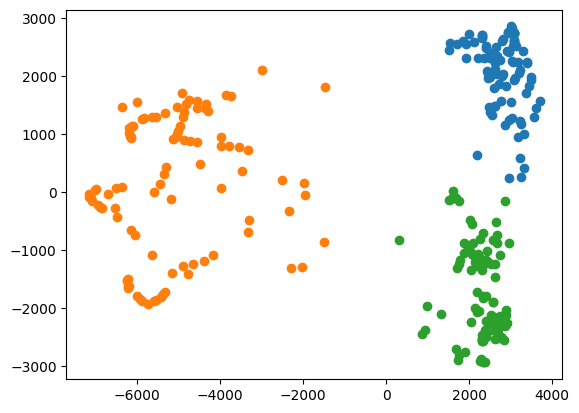

In [40]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])